# Project2: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
For the project 2, I will conduct my own data analysis and create a file to share that documents my findings. Then I use pandas and NumPy to answer the questions,  and create a report sharing the answers. 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

There are two questions will be ask:
    
Which genres are most popular from year to year? 

What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
## Data Wrangling


### Assessing Data

Donload TMDb movie data from https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True
    
Then upload it to Jupyter Notebook.

In [1]:
# Import all the software that I will use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
movies = pd.read_csv('movies.csv')
# View movies
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Column labels are lowercase and underscores, that I don't need to rename them.

In [3]:
# Look at the shape from movies
movies.shape

(10866, 21)

>Whole data has 10866 rows and 21 columns.

In [4]:
# Look at the information from movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>According to the questions that I asked, some of columns seem no value to me. I decide to drop these columns.

>There are some columns miss value. Especially the cast and director columns, they don't have much impact to the result. So I decide drop those rows that have missing value.

### Data Cleaning

In [5]:
# Drop columns from movies
movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
movies.head()

,popularity,budget,revenue,original_title,cast,director,genres,vote_average
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.1
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3


### Drop Null

In [6]:
# Drop rows from movies
movies.dropna(axis=0, how='any', inplace=True)

In [7]:
# Check if there still have any row with null
movies.isnull().sum().any()

False

In [8]:
# Confirm changes
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
genres            10732 non-null object
vote_average      10732 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 754.6+ KB


>All columns are correct.

In [9]:
# View budget's numeral value interval
movies['budget'].describe()

count    1.073200e+04
mean     1.480506e+07
std      3.106345e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.600000e+07
max      4.250000e+08
Name: budget, dtype: float64

>When I look at the result, I feel something wrong. 
Half of movies' budget is 0? Then I check the data, I find out they put 0 on the movies that they don't know how much budget spend.
In this case I'll delete the budget rows that is 0.

In [10]:
# Find out how many rows greater than 0
movies_realbd = movies.query('budget > 0')
movies_realbd.shape

(5154, 8)

In [11]:
# Delete those rows
movies_1 = movies[(True^movies['budget'].isin([0]))]

In [12]:
# Do same thing to revenue column
movies_realrn = movies.query('revenue > 0')
movies_realrn.shape

(4844, 8)

In [13]:
# Do the same thing as budegt
movies_clean = movies_1[(True^movies_1['revenue'].isin([0]))]

### Dedup Data

In [14]:
# Check how many duplicated rows
sum(movies_clean.duplicated())

1

>There has 1 duplicated data in the file.

In [15]:
# Aviod Setting With Copy Warning
movies_clean = movies_clean.copy()

In [16]:
# Drop duplicated row
movies_clean.drop_duplicates(inplace=True)

In [17]:
# Confirm changes
sum(movies_clean.duplicated())

0

### Inspecting Data Types

In [18]:
# Inspecting data types
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 8 columns):
popularity        3849 non-null float64
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
genres            3849 non-null object
vote_average      3849 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 270.6+ KB


>Check the data type, then make sure every columns are correct.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most popular from year to year? 

In [19]:
# Using groupby command to category movie types
genres = movies_clean.groupby('genres', as_index=False)['popularity'].mean()
genres.head()

,genres,popularity
0,Action,1.054640
1,Action|Adventure,1.033860
2,Action|Adventure|Animation|Family|Fantasy,1.071695
3,Action|Adventure|Animation|Family|Science Fiction,3.339406
4,Action|Adventure|Animation|Science Fiction,0.480116


In [20]:
# Find out the most popilar movie type
most_popular =genres.query('popularity == popularity.max()')
most_popular

,genres,popularity
296,Adventure|Drama|Science Fiction,24.949134


>The genre of Adventure|Drama|Science Fiction is the most popular from year to year.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

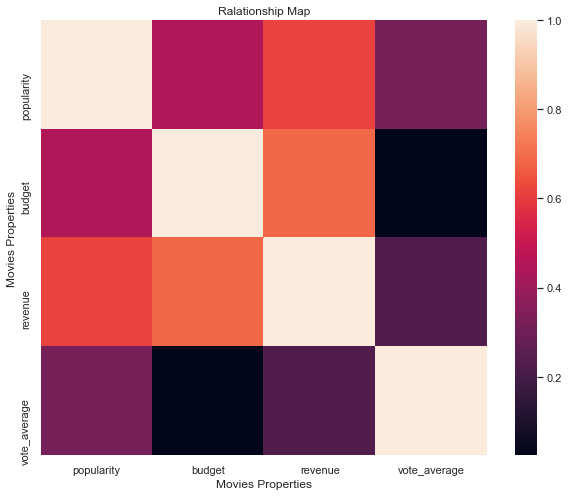

In [21]:
# Create a correlation matrix to show the variables correlated
corr = movies_clean.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Ralationship Map')
plt.xlabel('Movies Properties')
plt.ylabel('Movies Properties')
plt.show()

>Looks like budget and popularity prrety much impact the revenue. Ratings not that much. 

>So I'm going to dig in budget frist.

In [22]:
# View budget's numeral value interval
movies_clean['budget'].describe()

count    3.849000e+03
mean     3.724886e+07
std      4.221699e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [23]:
# Category budget rate as Low and High
bin_edges = [1.000000e+00, 1.000000e+07, 4.250000e+08]
bin_names = ['Low', 'High']
movies_clean['budget_levels'] = pd.cut(movies_clean['budget'], 
                                 bin_edges, 
                                 labels=bin_names)
movies_clean.head()

,popularity,budget,revenue,original_title,cast,director,genres,vote_average,budget_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3,High


In [24]:
# Using 'groupby' command to find out the relationship between budget and revenue
movies_budget = movies_clean.groupby('budget_levels')['revenue'].mean()
movies_budget.head()

budget_levels
Low     2.679587e+07
High    1.379093e+08
Name: revenue, dtype: float64

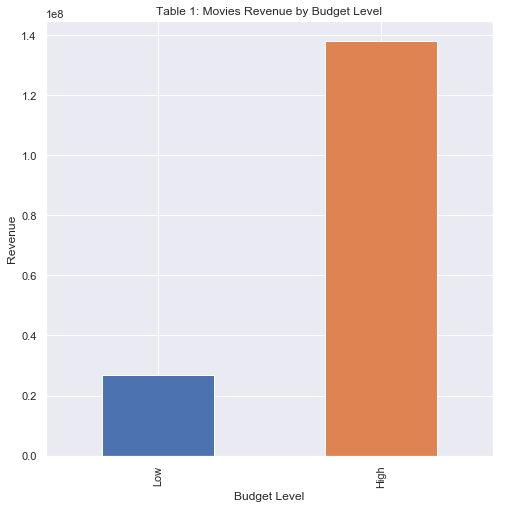

In [25]:
# Create table 1 to make the result visualized
movies_budget.plot(kind='bar',
                   title='Table 1: Movies Revenue by Budget Level', 
                   figsize=(8, 8))
plt.xlabel('Budget Level')
plt.ylabel('Revenue')
plt.show()

>Table shows that budget have positive impact to revenue. More budget in movies means it can get higher revenue.

>Second, I wonder if audience impact the revenue.

In [26]:
# View popularity's numeral value interval
movies_clean['popularity'].describe()

count    3849.000000
mean        1.192933
std         1.475622
min         0.001117
25%         0.463337
50%         0.798582
75%         1.374300
max        32.985763
Name: popularity, dtype: float64

In [27]:
# Same process as budget
bin_edges = [0.001117, 0.463337, 0.798582, 1.374300, 32.985763]
bin_names = ['No Interested', 'Low', 'Medium', 'High']
movies_clean['popular_levels'] = pd.cut(movies_clean['popularity'], 
                                  bin_edges, 
                                  labels=bin_names)
movies_clean.head()

,popularity,budget,revenue,original_title,cast,director,genres,vote_average,budget_levels,popular_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6.5,High,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,7.1,High,High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,6.3,High,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,High,High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,7.3,High,High


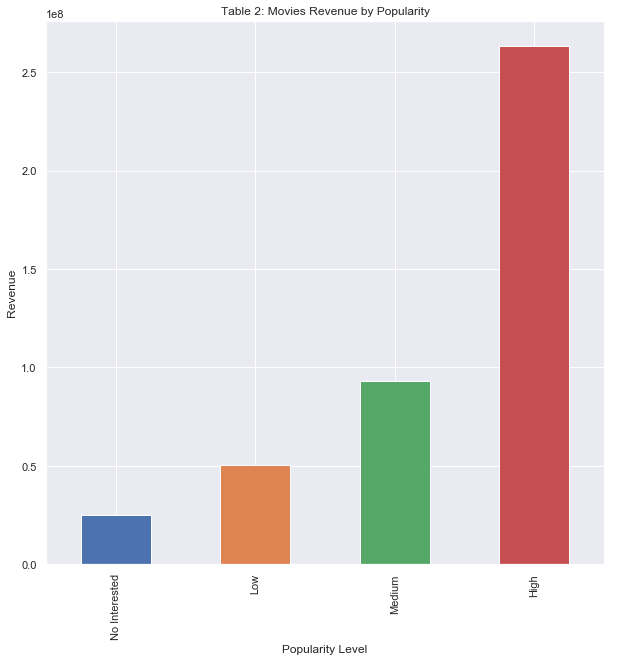

In [28]:
# Using 'groupby' command to find out the relationship between popularity and revenue
movies_popu = movies_clean.groupby('popular_levels')['revenue'].mean()
# Create table 2 shows the result
movies_popu.plot(kind='bar', 
                 x='popular_levels',
                 y='revenue',
                 title='Table 2: Movies Revenue by Popularity',
                 figsize=(10, 10))
plt.xlabel('Popularity Level')
plt.ylabel('Revenue')
plt.show()

>Table 2 shows that popularity also have positive impact to revenue. Movies have high popularity get more higher revenue.

>I also want to know how ratings impact the revenue

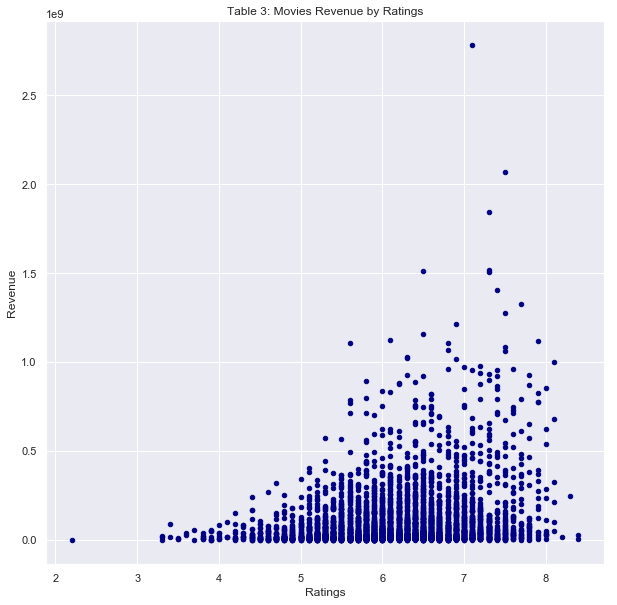

In [29]:
# Create a table shows the relationship between ratings and revenue
movies_clean.plot.scatter(x='vote_average',
                    y='revenue',
                    color='DarkBlue', 
                    title='Table 3: Movies Revenue by Ratings', 
                    figsize=(10, 10))
plt.xlabel('Ratings')
plt.ylabel('Revenue')
plt.show()

>Table3 shows that rating does impact the revenue of movies. The movies by rating between 5 to 8 have more chance to get high rvenue.

>Finally, I'm think about what derictor, actor and actress can do with box office.

In [30]:
# Category movies by director
movies_direc = movies_clean.groupby('director', as_index=False)['revenue'].mean()
movies_direc.head()

,director,revenue
0,FrÃ©dÃ©ric Jardin,3358.0
1,A.R. Murugadoss,76000000.0
2,Aaron Blaise|Robert Walker,250.0
3,Aaron Norris,5093707.0
4,Aaron Seltzer|Jason Friedberg,48548426.0


In [31]:
# Array the director by ascending revenue
movies_direc10 = movies_direc.sort_values(by='revenue', ascending=False)
movies_direc10

,director,revenue
227,Chris Buck|Jennifer Lee,1.274219e+09
928,Kyle Balda|Pierre Coffin,1.156731e+09
617,Irwin Winkler,1.106280e+09
949,Lee Unkrich,1.063172e+09
381,David Yates,1.038574e+09
61,Andrew Adamson|Kelly Asbury|Conrad Vernon,9.198388e+08
1526,Steve Martino|Mike Thurmeier,8.772448e+08
77,Andrew Stanton|Lee Unkrich,8.646260e+08
1224,Pete Docter,8.537086e+08
236,Chris Miller|Raman Hui,7.989582e+08


>Looks like director does impact the movies' revenue. Some famous directors made high box office record.

## Limitations
Limitations:
If data is incomplete. Missing values, even the lack of a section or a substantial part of the data, could limit its usability.

In this case, there have 76 missing values in cast column and 23 missing values in genre column, after I clean the data.
Since I have 10866 rows in dataset, missing values or null less than 1 percent. So I don't think it will change my result.

There also have inaccuracy data from budget and revenue. Many movies budget and revenue is 0. This is why it happens:

"In general, major studios don’t disclose the full budgets for their films (production, development, and marketing/advertising). 
This is in part because it costs far more to make and market a film than it seems. 
For example, the production budget for a summer blockbuster such as Marvel’s "The Avengers" is recorded as $220 million, but if you factor in marketing and advertising costs, that number spikes."[1]

Many movies don't have their revenue, because is hard to count.
After I clean those rows, there are only 3849 samples left. But, this process makes the analysis more accuracy.


<a id='conclusions'></a>
## Conclusions

After analyzed movies data, I get the answers for both questions.First, the genre of Adventure|Drama|Science Fiction is the most popular from year to year.

Second, I find out budget, popularity, ratings(vote_average) and director are associated with movies that have high revenues.

Box office earnings are the primary metric for trade publications in assessing the success of a film.

From Table 1, the chances of a high-budget movie getting a high box office are significantly greater than those of a low-invested movie. Because high investment means that famous directors and actors will join, and there will be good production and advertisement. This makes more people to watch the movie.

From Table 2, the popularity has positive impact to revenue. As it increase, the revenue of the movie is also mentioned.

From Table 3, The rating scores for movies that get high box office are concentrated between 5 and 8 points. But, when the film's score is higher than 8 points, its box office income is falling.

The director also has an impact on box office revenue. Some famous directors' films often get a higher box office.

In short, a successful film must be attended by a famous director and has high investment, high popularity and high ratings. 

### Citation:
[1] How Exactly Do Movies Make Money? 
https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp